<a href="https://colab.research.google.com/github/cybervalient/DeepMD_AWV/blob/main/MalariaDataMLModelsv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import QuantileTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [62]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Datareadyformodeling(whembe).xlsx to Datareadyformodeling(whembe) (2).xlsx


In [63]:
malaria_df=pd.read_excel("Datareadyformodeling(whembe) (2).xlsx")
#malaria_df.drop(['Unnamed: 0'],axis=1,inplace=True)
malaria_df.sample(10)

,Date,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
174,2012-07-31,4,47.1,51.5,-1.71,0.0,0.0,52.686828,16.331048
193,2014-02-28,126,247.8,236.0,-0.15,70.2,74.8,75.688988,23.164881
169,2012-02-29,182,151.4,161.4,-1.14,49.5,25.7,67.485632,24.853448
51,2002-04-30,419,153.9,108.0,-0.71,22.3,10.3,67.080556,21.092778
139,2009-08-31,11,77.0,97.6,-0.65,0.1,0.4,55.790323,17.085081
67,2003-08-31,13,69.2,54.6,-1.10,0.9,0.6,53.065860,17.688575
13,1999-02-28,759,434.7,247.8,1.44,218.2,69.9,90.845238,23.234226
63,2003-04-30,292,143.5,108.3,-1.04,8.2,1.4,69.552778,21.916667
220,2016-05-31,58,139.9,117.5,-0.70,9.4,14.1,66.321237,17.564516
186,2013-07-31,17,98.1,138.7,-0.50,1.2,2.3,61.153226,16.136156


In [59]:
malaria_df = malaria_df.drop(['Capricorn','Greater Sekhukhune','Mopani','Waterberg','provincial'], axis = 1)
#print(type(features))

KeyError: ignored

In [64]:
malaria_df.set_index('Date',inplace=True)

In [65]:
malaria_df.head()

,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,,
1998-01-31,244,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28,562,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31,312,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30,269,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31,101,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215


In [66]:
def find_outliers_IQR(malaria_df):

   q1=malaria_df.quantile(0.25)

   q3=malaria_df.quantile(0.75)

   IQR=q3-q1

   outliers = malaria_df[((malaria_df<(q1-1.5*IQR)) | (malaria_df>(q3+1.5*IQR)))]

   return outliers

In [67]:
outliers=find_outliers_IQR(malaria_df)

In [68]:
outliers

,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,,
1998-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,1679.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-31,1639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
def non_outliers_IQR(malaria_df):

   q1=malaria_df.quantile(0.25)

   q3=malaria_df.quantile(0.75)

   IQR=q3-q1

   non_outliers = malaria_df[~((malaria_df<(q1-1.5*IQR)) | (malaria_df>(q3+1.5*IQR)))]
      
   return non_outliers

In [70]:
malaria_df=non_outliers_IQR(malaria_df)

In [71]:
malaria_df

,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,,
1998-01-31,244.0,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28,562.0,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31,312.0,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30,269.0,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31,101.0,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215
...,...,...,...,...,...,...,...,...
2017-08-31,539.0,129.1,64.8,0.91,11.1,0.0,53.456989,18.614785
2017-09-30,NaN,108.5,48.4,0.45,12.2,0.0,57.401060,20.807244
2017-10-31,NaN,127.0,70.3,0.58,49.7,36.5,57.849315,22.856164


In [72]:
# Find the mean excluding NaN values using DataFrame.mean()
#df2 = df.mean(axis = 0, skipna = True)
#Exclude NA/null values when computing the result.
#malaria_df=malaria_df.dropna()
malaria_df = malaria_df.fillna(malaria_df.mean(axis = 0, skipna = True))

In [73]:
malaria_df

,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,,
1998-01-31,244.000000,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28,562.000000,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31,312.000000,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30,269.000000,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31,101.000000,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215
...,...,...,...,...,...,...,...,...
2017-08-31,539.000000,129.1,64.8,0.91,11.1,0.0,53.456989,18.614785
2017-09-30,204.599099,108.5,48.4,0.45,12.2,0.0,57.401060,20.807244
2017-10-31,204.599099,127.0,70.3,0.58,49.7,36.5,57.849315,22.856164


In [74]:
X=malaria_df.drop(['Vhembe'], axis = 1)
X

,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,
1998-01-31,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215
...,...,...,...,...,...,...,...
2017-08-31,129.1,64.8,0.91,11.1,0.0,53.456989,18.614785
2017-09-30,108.5,48.4,0.45,12.2,0.0,57.401060,20.807244
2017-10-31,127.0,70.3,0.58,49.7,36.5,57.849315,22.856164


In [75]:
Y=malaria_df['Vhembe']
Y

Date
1998-01-31    244.000000
1998-02-28    562.000000
1998-03-31    312.000000
1998-04-30    269.000000
1998-05-31    101.000000
                 ...    
2017-08-31    539.000000
2017-09-30    204.599099
2017-10-31    204.599099
2017-11-30    361.000000
2017-12-31    204.599099
Name: Vhembe, Length: 240, dtype: float64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [77]:
corr1=X_train.corr(method = 'pearson')

<AxesSubplot:>

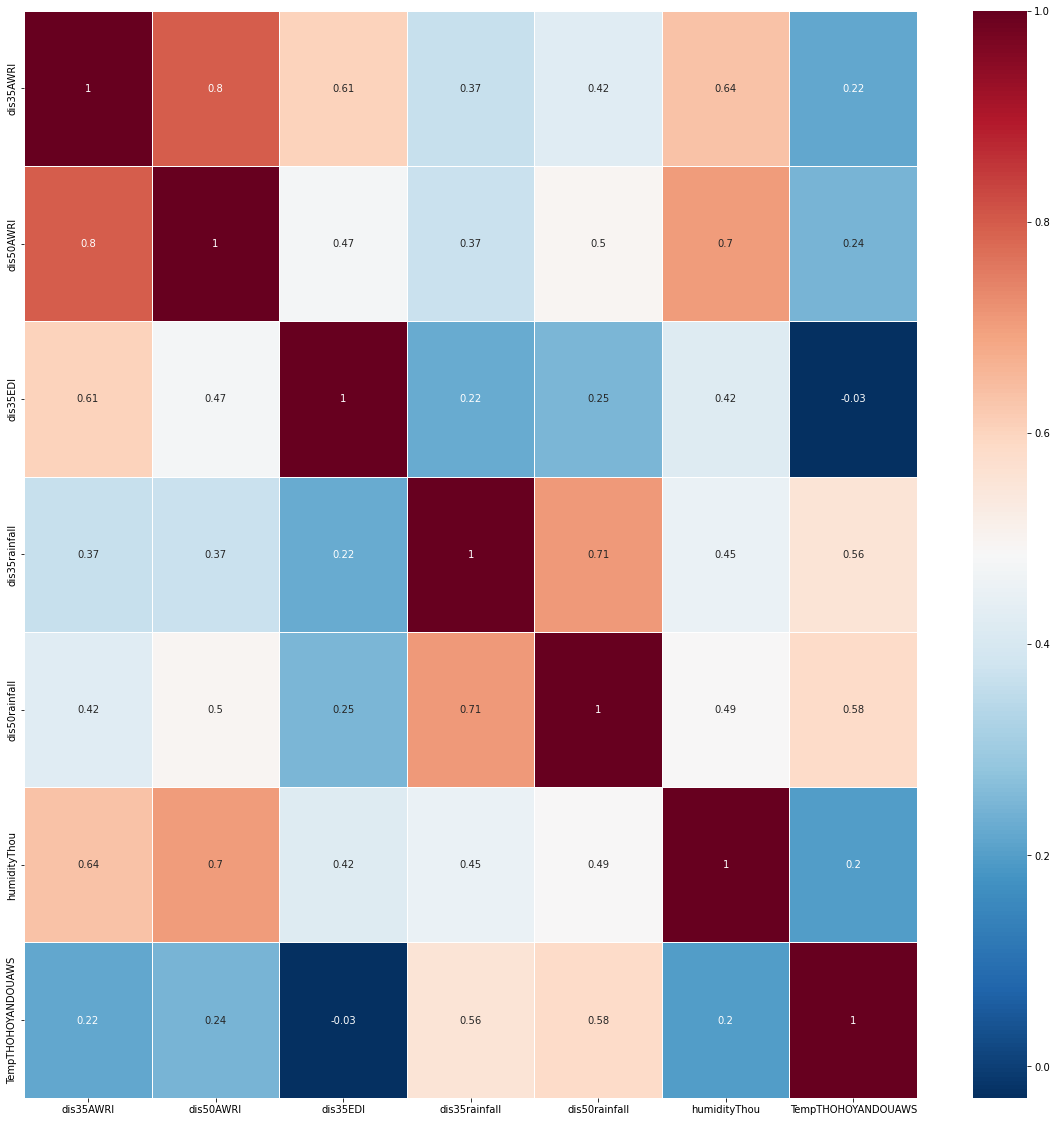

In [78]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corr1,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [79]:
def correlation(dataset, threshold):
    column_corr=set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
     for j in range(i):
        if (corr_matrix.iloc[i,j])>threshold:
            colname=corr_matrix.columns[i]
            column_corr.add(colname)
    return column_corr

In [80]:
highly_corr_features= correlation(X_train, 0.95)
len(set(highly_corr_features))

0

In [81]:
highly_corr_features=list(highly_corr_features)

In [82]:
highly_corr_features

[]

In [83]:
malaria_df = malaria_df.drop(highly_corr_features, axis = 1)

In [84]:
malaria_df.shape

(240, 8)

In [85]:
features=malaria_df.drop(['Vhembe'], axis = 1)
features

,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,
1998-01-31,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215
...,...,...,...,...,...,...,...
2017-08-31,129.1,64.8,0.91,11.1,0.0,53.456989,18.614785
2017-09-30,108.5,48.4,0.45,12.2,0.0,57.401060,20.807244
2017-10-31,127.0,70.3,0.58,49.7,36.5,57.849315,22.856164


In [86]:
target=malaria_df['Vhembe']
target

Date
1998-01-31    244.000000
1998-02-28    562.000000
1998-03-31    312.000000
1998-04-30    269.000000
1998-05-31    101.000000
                 ...    
2017-08-31    539.000000
2017-09-30    204.599099
2017-10-31    204.599099
2017-11-30    361.000000
2017-12-31    204.599099
Name: Vhembe, Length: 240, dtype: float64

In [87]:
def mutual_info_regressions_scores(kvalue,target=malaria_df['Vhembe']):
         
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import mutual_info_regression
           
    select_univariate = SelectKBest(mutual_info_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    features.columns[feature_mask]
         
    mutual_info_coef = pd.DataFrame({'FeatureName': features.columns, 
                   'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                   ascending=False).head(kvalue) 
    return mutual_info_coef

In [88]:
mutual_info_regressions_scores(5)

,FeatureName,Score
0,dis35AWRI,0.245394
6,TempTHOHOYANDOUAWS,0.240436
3,dis35rainfall,0.210426
4,dis50rainfall,0.199263
1,dis50AWRI,0.168845


In [89]:
def f_regression_scores(kvalue,target=malaria_df['Vhembe']):
         
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    
    select_univariate = SelectKBest(f_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    feature_mask
    features.columns[feature_mask]
    select_univariate.scores_
    f_regression_coef= pd.DataFrame({'FeatureName': features.columns, 
                  'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                   ascending=False).head(kvalue)
    
    return f_regression_coef

In [90]:
f_regression_scores(5)

,FeatureName,Score
5,humidityThou,58.292691
6,TempTHOHOYANDOUAWS,52.961420
1,dis50AWRI,40.800147
0,dis35AWRI,35.290910
4,dis50rainfall,32.934124


In [91]:
def lasso_coef_scores(kvalue,target=malaria_df['Vhembe']):
      
    from sklearn.linear_model import  Lasso
    warnings.filterwarnings('ignore')

    lasso = Lasso(alpha=1.0)

    lasso.fit(features, target)

    lasso_coef = pd.DataFrame({'Feature': features.columns, 
                               'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                      ascending =False).head(kvalue)

   
    return lasso_coef

In [93]:
#from sklearn.feature_selection import mutual_info_regression
lasso_coef_scores(9)  #30,10,27


,Feature,LassoCoef
2,dis35EDI,58.382671
6,TempTHOHOYANDOUAWS,26.609178
5,humidityThou,6.859450
1,dis50AWRI,0.260469
3,dis35rainfall,-0.065773
0,dis35AWRI,-0.429783
4,dis50rainfall,-0.670880


In [94]:
def select_columns(kvalue,target=malaria_df['Vhembe']):
    
    #Code to get the K best Features using mutual information   
    from sklearn.feature_selection import SelectKBest

    from sklearn.feature_selection import mutual_info_regression
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import f_regression

    
        
    select_univariate = SelectKBest(mutual_info_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    features.columns[feature_mask]

        #Kbest_features=  features.columns[feature_mask]
        #regression_analysis_scores  - select_univariate.scores_   
    mutual_info_coef = pd.DataFrame({'FeatureName': features.columns, 
                   'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                    ascending=False) 

    mutual_info_df = mutual_info_coef.sort_values(by='Score', ascending=False).head(kvalue) 

    mutual_info_df = pd.DataFrame({'Mutual Information Method': mutual_info_df['FeatureName'].values}) 

    ##############################Code below for F regression Method####################
    
    select_univariate = SelectKBest(f_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    feature_mask
    features.columns[feature_mask]
    select_univariate.scores_
    f_regression_coef= pd.DataFrame({'FeatureName': features.columns, 
                  'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                   ascending=False)
    f_regression_df = f_regression_coef.sort_values(by='Score', ascending=False).head(kvalue)
    f_regression_df = pd.DataFrame({'F Regresion Method': f_regression_df['FeatureName'].values})
    
  

    from sklearn.linear_model import  Lasso
    warnings.filterwarnings('ignore')

    lasso = Lasso(alpha=1.0)

    lasso.fit(features, target)

    lasso_coef = pd.DataFrame({'Feature': features.columns, 
                               'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                      ascending =False)

    lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])


    lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(kvalue)

    lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})

    comp_selected_col_df = [lasso_df,
                            f_regression_df,
                            mutual_info_df]
    final_selected_col_df = pd.concat(comp_selected_col_df, axis=1)
    
    return final_selected_col_df

In [95]:
final_selected_col_df = select_columns(5)  #30,10,27
final_selected_col_df

,Lasso Method,F Regresion Method,Mutual Information Method
0,dis35EDI,humidityThou,dis35AWRI
1,TempTHOHOYANDOUAWS,TempTHOHOYANDOUAWS,TempTHOHOYANDOUAWS
2,humidityThou,dis50AWRI,dis35rainfall
3,dis50rainfall,dis35AWRI,dis50rainfall
4,dis35AWRI,dis50rainfall,dis50AWRI


In [96]:
selectiontech = list(final_selected_col_df.columns)

In [97]:
selectiontech

['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

In [98]:
list(malaria_df[final_selected_col_df['Lasso Method'].values].columns)

['dis35EDI',
 'TempTHOHOYANDOUAWS',
 'humidityThou',
 'dis50rainfall',
 'dis35AWRI']

In [99]:
malaria_df[final_selected_col_df['Lasso Method'].values]

,dis35EDI,TempTHOHOYANDOUAWS,humidityThou,dis50rainfall,dis35AWRI
Date,,,,,
1998-01-31,-0.80,24.667608,79.629032,110.5,170.2
1998-02-28,-1.19,24.531596,76.565287,11.5,133.6
1998-03-31,-1.33,25.079704,69.357527,17.9,114.2
1998-04-30,-1.45,21.465139,74.320833,3.9,93.8
1998-05-31,-1.49,18.835215,57.954301,0.0,73.5
...,...,...,...,...,...
2017-08-31,0.91,18.614785,53.456989,0.0,129.1
2017-09-30,0.45,20.807244,57.401060,0.0,108.5
2017-10-31,0.58,22.856164,57.849315,36.5,127.0


In [100]:
#Dictionary to hold the training and the test scores from the different Models  that we build and train
#The keys wil be the meaningfull names for the different models that we build and te values will be Training and Test R2s
#We can use the dictionary to compare different models
result_dict = {}

In [101]:
#Helper function build_model that will build and train the different  Models 

#Input Arguments

    #1. regression_fn - It takes the trainning data and the corresponding target values It instantiates a particular model e.g DicisionTree,MLP
    #2. name_of_y_col - specifies the column names for the target values we should use for Training.
    #3. names_of_x_cols - is a list of Feature columns
    #4. dataset - original dataframe with the features and our Target Values
    #5. test_frac - How much of our data we should hold out to evaluate or measure our model.the Fraction of our data that will be used as test data
    #6. preprocess_fn - if you want the data to be preprocesed i.e standardized or scaled by default its set to None
    #7. show_plot_Y - To display a plot of Actual vs Predicted set to True
    #8. show_plot_scatter - If you want to see how you Regression Line fits on the Training data - set it to True

def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols,
                NKbest,
                FS_Technique,
                dataset,
                GridSearch=False,
                test_frac=0.3,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False
                     ):

    #Extact from the dataset the features that you want to train your Models to variable X
    X = dataset[names_of_x_cols]
    #Extract the target value into Y
    Y = dataset[name_of_y_col]
    
    #call the function to apply scaling
    if preprocess_fn is not None:
        X = preprocess_fn(X)
        
    #Split dataset into Training and Test data    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    #Pass the Training data  and the corresponding Lables to the Regression Function
    #The Function will return a fully trained ML Model which you can use for prediction and store the predicted values in y_pred
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)

    #Print the R2 values on the Training data as well as the test data for the model 
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : " , model.score(x_test, y_test))
    print("r_score : ", r2_score(y_test, y_pred))
    print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
    print("Number of features Selected : ", NKbest)
    print("Feature Selection Technique : ", FS_Technique)
    
    best_params={}    
    if GridSearch == True:
        best_params=model.best_params_
    # If you Invoke the build model with function show_plot_Y == True : Plot the Actual values vs Predicted values in the form of a line chart
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()
        
    #To display a scatter plot on matplotlib , NB: This works if you only used a single feature for training
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    #From this Function we return the Training score and test R2 score for this particular Model
    
    return {
            'training_score': model.score(x_train, y_train),
            'Test_score' :   model.score(x_test, y_test),   
            'r_score': r2_score(y_test, y_pred),
            'mean_squared_error ':  mean_squared_error(y_test, y_pred),
            'Selection Technique' : FS_Technique,
            'Best Params' : best_params
                    
           }    

In [102]:
#Function to scale the data  using standered scaler
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [46]:
#apply_standard_scaler(x)

In [103]:
#This function quickly print out the Training and test score for all the Models that we build so far
#The code will read the resuts stored in the dictionary (result_dict)
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Selection Technique: ', FS_Technique)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['Test_score'])
        print('r_score', result_dict[key]['r_score'])
        print('mean_squared_error ', result_dict[key]['mean_squared_error '])
        print('Best params ', result_dict[key]['Best Params'])
        print()

In [104]:
#result_dict = {}
compare_results()

In [ ]:
# key_list = list(result_dict.values())
# print(key_list)

In [105]:
#Function to test DecisionTreeRegressor algorith without GridSearch
def tree_reg(x_train, y_train):    
    model = DecisionTreeRegressor()
    #model = DecisionTreeRegressor(max_depth=2, random_state=42) 
    model.fit(x_train, y_train)
    
    return model

In [106]:
#Function to train the Model using DecisionTreeRegressor and using Gridsearch and cross validation to get the parameters
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#Verbose is just the info you want to be printed when your Gridsearch is runnin5

def tree_regGcv(x_train, y_train):
    params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
                  
    model = GridSearchCV(DecisionTreeRegressor(random_state=42),params,verbose=1, cv=3)
    model.fit(x_train, y_train)
    
    return   model 

# def tree_regGcv(x_train, y_train):
#     params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
#     grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)

#     grid_search_cv.fit(x_train, y_train)
    
        
#     model = DecisionTreeRegressor(max_leaf_nodes=grid_search_cv.best_params_['max_leaf_nodes'],
#                                   min_samples_split=grid_search_cv.best_params_['min_samples_split'],
#                                   random_state=42)
#     model.fit(x_train, y_train)
    
#     return   model


Fitting 3 folds for each of 294 candidates, totalling 882 fits
Training_score :  0.26062561458850564
Test_score :  0.02439603077280239
r_score :  0.02439603077280239
mean_squared_error :  32065.80004782044
Number of features Selected :  5
Feature Selection Technique :  F Regresion Method


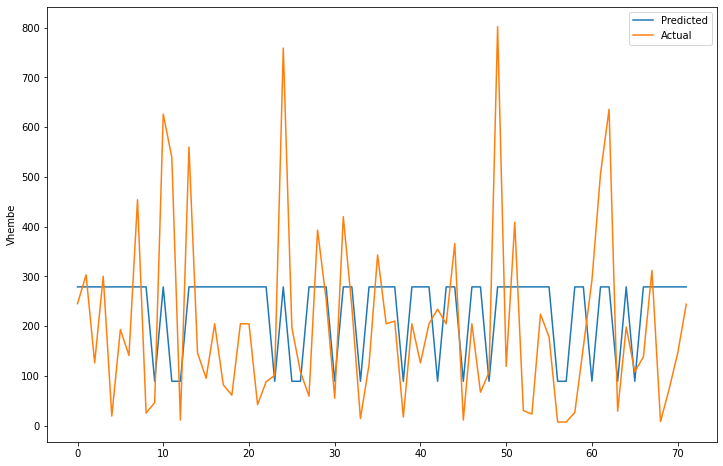

In [114]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(5)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['Gcv ~ Gcv~DecisionTreeRegressor'] = build_model(tree_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [115]:
#Function to test Support Vector Machine algorith without GridSearch
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model


In [116]:
#Function to train the Model using Suport Vector machine  using Gridsearch and cross validation to get the parameters
def svr_regGcv(x_train, y_train):
    params={'C': [1, 10],'degree':(2,3) ,'kernel': ('linear', 'poly','rbf')}
    model = GridSearchCV(SVR(), params, verbose=1, cv=3)
    model.fit(x_train, y_train)
    
    return model

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Training_score :  0.24195891524136715
Test_score :  0.2871423701139768
r_score :  0.2871423701139768
mean_squared_error :  30900.359220309907
Number of features Selected :  7
Feature Selection Technique :  F Regresion Method


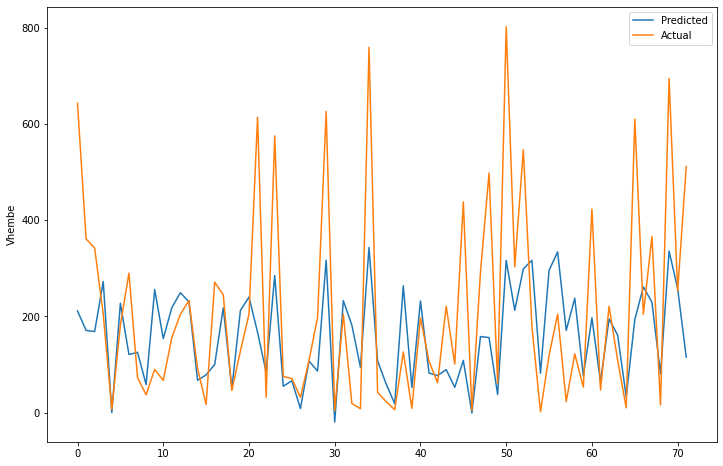

In [125]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(7)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~SVR'] = build_model(svr_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [ ]:
#Averaging Techniques - data training in parallel
#Bagging and pasting involve using the same training algorith on a different subsets of the training data
#r2 is how much of the variance in the underlying data is captured by this model -  most objective measure

#oob_score  = True Perfom out-of-bag evaluation after training - 
#instances that were not used for training will be used for evaluating a predictor


In [ ]:
#Averaging Techniques - data training in parallel
### Pasting

#Here we perform sampling without replacement (bootstrap=False), this method is called pasting

In [126]:
#Function to test BaggingRegressor algorith without GridSearch
def pas_reg(x_train, y_train):
    model = BaggingRegressor(DecisionTreeRegressor(), 
                               n_estimators = 500,
                               bootstrap = False,
                               max_samples = 1.0,
                               n_jobs = -1)
    model.fit(x_train, y_train)
    
    return model

In [127]:
#Function to test Pasting BaggingRegressor algorith with GridSearch
def pas_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500, 600]
            
        }

        model = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),
                                              bootstrap = False,
                                              max_samples = 1.0),
                                              param_grid
                                            )
        model.fit(x_train, y_train)
        
        return model

Training_score :  1.0
Test_score :  -0.24988550859833314
r_score :  -0.24988550859833314
mean_squared_error :  46371.72585415972
Number of features Selected :  7
Feature Selection Technique :  Mutual Information Method


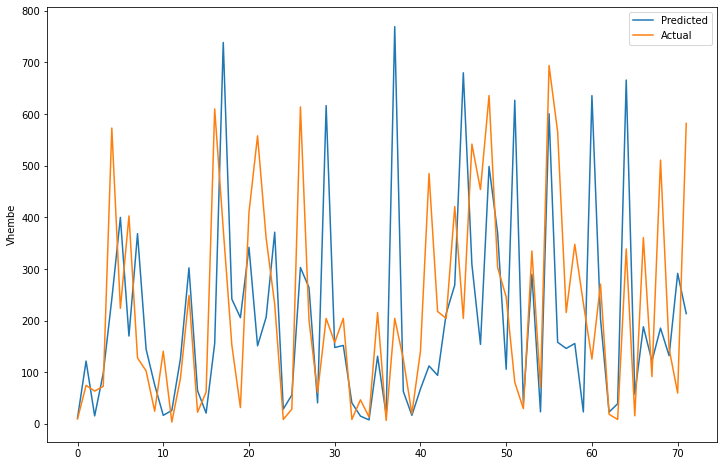

In [132]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(7)  #30,10,27

FS_Technique = 'Mutual Information Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~Pas~BaggingRegressor'] = build_model(pas_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [ ]:
#Averaging Techniques - data training in parallel

# # ### Bagging
# # - Here we perform sampling with replacement (bootstrap=True), this method is called bagging. 

# # So 63% of the training instances are sampled on average for each predictor. 
# By setting oob_score=True we are doing an automatic evaluation after training 
#using the remaining 37% of the training instance which is not sampled 
# and this data is called out-of-bags(oob).


In [133]:
#Function to test BaggingRegressor algorith without GridSearch

def bag_reg(x_train, y_train):
    model = BaggingRegressor(DecisionTreeRegressor(), 
                               n_estimators = 500,
                               bootstrap = True,
                               max_samples = 1.0,
                               n_jobs = -1)
    model.fit(x_train, y_train)
    
    return model

In [134]:
#Function to test BaggingRegressor algorith with GridSearch

def bag_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500]
            
        }

        model = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),
                                              bootstrap = True,
                                              max_samples = 1.0,
                                              n_jobs = -1),
                                              param_grid
                                            )
        model.fit(x_train, y_train)
        
        return model

Training_score :  0.8873270104081079
Test_score :  0.2605811858592245
r_score :  0.2605811858592245
mean_squared_error :  21984.973878352364
Number of features Selected :  3
Feature Selection Technique :  F Regresion Method


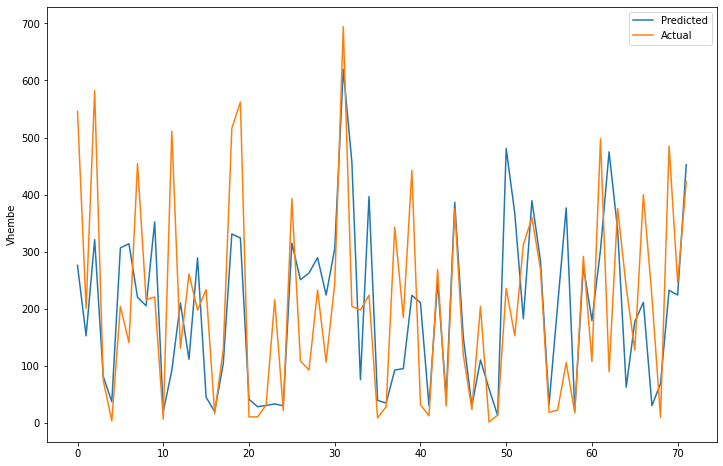

In [141]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(3)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~Bag~BaggingRegressor'] = build_model(bag_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [142]:
#Function to test RandomForestRegressor algorith without GridSearch
def rnd_reg(x_train, y_train):
    model = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
    
    model.fit(x_train, y_train)
    
    return model

In [143]:
#Function to test RandomForestRegressor algorith with GridSearch

def rnd_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600]
        }

        model = GridSearchCV(RandomForestRegressor(
                                              bootstrap = True,
                                              max_samples = 1.0,
                                              n_jobs = -1,
                                              max_leaf_nodes=12),
                                              param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model

Training_score :  0.6671805545957323
Test_score :  0.26569489625627163
r_score :  0.26569489625627163
mean_squared_error :  22753.250133590544
Number of features Selected :  3
Feature Selection Technique :  F Regresion Method


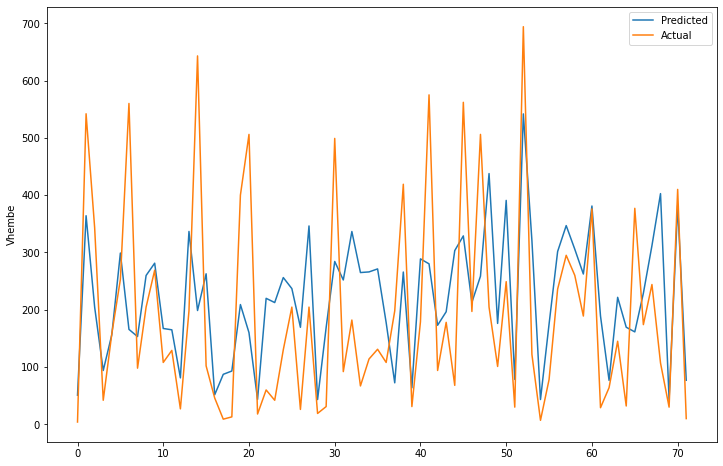

In [145]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(3)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~RandomForestRegressor'] = build_model(rnd_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [ ]:
# ### ExtraTreesClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html    
# Extra-Tree Regressor is growing tree even more random by using random thresholds for each features rather than searching 
# #for best possible thresholds(like regular decision tree).

In [146]:
#Function to test ExtraTreesRegressor algorith without GridSearch
def extra_reg(x_train, y_train):
    model = ExtraTreesRegressor(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

    model.fit(x_train, y_train)
    
    return model

In [147]:
#Function to test ExtraTreesRegressor algorith without GridSearch

def extra_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]
        }

        model = GridSearchCV(ExtraTreesRegressor(
                                              bootstrap = True,
                                              max_samples = 1.0,
                                              n_jobs = -1,
                                              max_leaf_nodes=16),
                                              param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model

Training_score :  0.5665323221311351
Test_score :  0.3263320036407036
r_score :  0.3263320036407036
mean_squared_error :  23603.4767267274
Number of features Selected :  3
Feature Selection Technique :  F Regresion Method


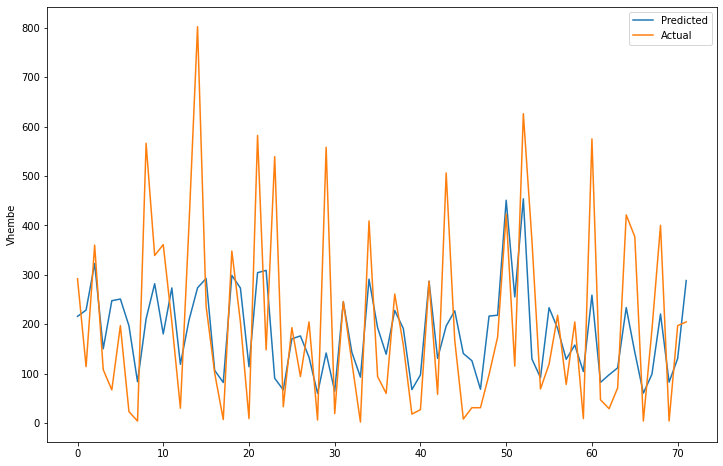

In [149]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(3)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~ExtraTreesRegressor'] = build_model(extra_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [150]:
#Function to test AdaBoostRegressor algorith without GridSearch
def ada_reg(x_train, y_train):
    model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), 
                            n_estimators=200, 
                            learning_rate=0.5)
    model.fit(x_train, y_train)
    
    return model


In [151]:
#Function to test AdaBoostRegressor algorith with GridSearch

def ada_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500,600],
            'learning_rate':[1.0, 0.5,0.1]
            
        }

        model = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=12)),
                                               param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model


Training_score :  0.9994181878780815
Test_score :  -0.008735120857716216
r_score :  -0.008735120857716216
mean_squared_error :  27220.546910089848
Number of features Selected :  3
Feature Selection Technique :  F Regresion Method


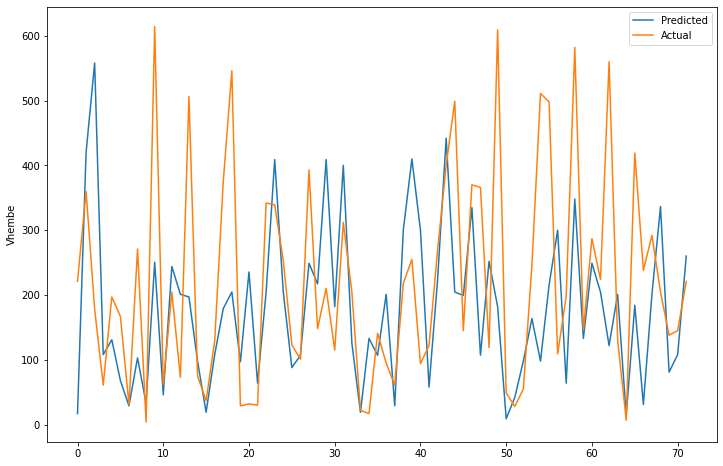

In [152]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(3)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~AdaBoostRegressor'] = build_model(ada_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [153]:
#Function to test GradientRegressor algorith without GridSearch
def gbr_reg(x_train, y_train):
    
    model = GradientBoostingRegressor(max_depth=3, n_estimators=30, learning_rate=0.1)
    model.fit(x_train, y_train)
    
    return model



In [154]:

#Function to test GradientRegressor algorith with GridSearch

def gbr_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500,600],
            'learning_rate':[1.0, 0.5,0.1]
            
        }

        model = GridSearchCV(GradientBoostingRegressor(max_depth=12),
                                               param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model


Training_score :  1.0
Test_score :  -0.18741830757167754
r_score :  -0.18741830757167754
mean_squared_error :  42882.91337044263
Number of features Selected :  7
Feature Selection Technique :  F Regresion Method


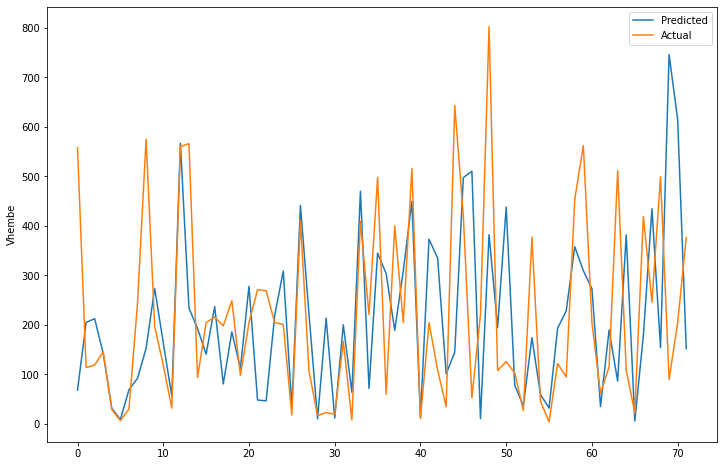

In [156]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(7)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~GradientBoostingRegressor'] = build_model(gbr_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [157]:
def ensemble_reg(x_train, y_train):
    
    et_reg = ExtraTreesRegressor(n_estimators = 600,max_leaf_nodes = 16,n_jobs = -1)
    rnd_reg = RandomForestRegressor(n_estimators=700)
    ada_reg=AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators = 700,learning_rate=0.1)
   
   
    model = VotingRegressor(estimators=
                                 [('et', et_reg), 
                                  ('rnd', rnd_reg), 
                                  ('dtr', ada_reg)])
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6963834501379764
Test_score :  0.4004583441361823
r_score :  0.4004583441361823
mean_squared_error :  21892.497041157854
Number of features Selected :  7
Feature Selection Technique :  F Regresion Method


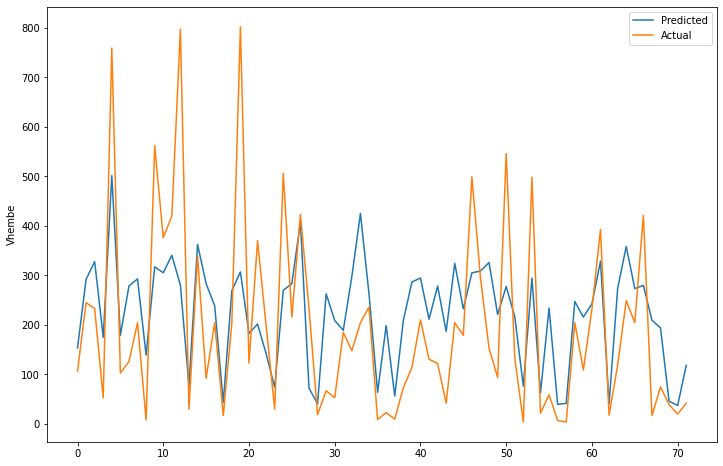

In [160]:
final_selected_col_df = select_columns(7)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=False
result_dict['model ~ Ensemble'] = build_model(ensemble_reg,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [161]:

#Function to test MLP algorith without GridSearch
def mlp_reg(x_train, y_train):
    model = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes=[10,20,30], 
                       solver='sgd', 
                       verbose=False,
                       max_iter=100000
                    )
    model.fit(x_train, y_train) 
    return model

In [165]:
final_selected_col_df = select_columns(3)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
GridSearch=False
lable = 'Vhembe'
result_dict['model ~ MLPRegressorGCV'] = build_model(mlp_reg,
                                                lable,
                                                feature_select,
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

ValueError: ignored

In [1]:
#Function to train the Model using Multilayer Percepton and using Gridsearch and cross validation to get the parameters
def mlp_regGcv(x_train, y_train):
    
    params = [
    {
     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
     'hidden_layer_sizes': [(30),(10, 30, 20)],
     'solver': ['lbfgs', 'sgd', 'adam','identity'],
     'verbose': [False], 
     'max_iter': [1000]
    }
    ]
    #model = GridSearchCV(MLPRegressor, params, verbose=1, cv=3)
    model = GridSearchCV(MLPRegressor(random_state=42), params, verbose=1, cv=5)
    model.fit(x_train, y_train)
    
    return model


In [2]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(3)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=False
result_dict['model ~ Gcv~GradientBoostingRegressor'] = build_model(mlp_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

NameError: ignored

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SequentialFeatureSelector


In [8]:
def KNNReg(x_train, y_train):
  model = KNeighborsRegressor(n_neighbors=5)
  #model = SequentialFeatureSelector(knn, n_features_to_select=25,direction='backward')
  model.fit(x_train, y_train)
  return model

In [9]:
final_selected_col_df = select_columns(5)  #30,10,27

FS_Technique = 'Mutual Information Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=False
result_dict['model ~ KNeighborsRegressor'] = build_model(KNNReg,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

NameError: ignored

# **Using H20 Amanzon**

In [10]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 5.9 MB/s eta 0:00:00


In [11]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp37evtlfw
  JVM stdout: /tmp/tmp37evtlfw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp37evtlfw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_l7s9jg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [12]:
h2o.display.toggle_user_tips()

In [14]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Datareadyformodeling(whembe).csv to Datareadyformodeling(whembe).csv


In [15]:
#df = pd.read_csv('train-2years.csv',index_col=0)
df = h2o.import_file('Datareadyformodeling(whembe).csv')
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Date,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
1998-01-31 00:00:00,244,170.2,194.6,-0.8,89,110.5,79.629,24.6676
1998-02-28 00:00:00,562,133.6,148.4,-1.19,11.9,11.5,76.5653,24.5316
1998-03-31 00:00:00,312,114.2,129.1,-1.33,13.3,17.9,69.3575,25.0797
1998-04-30 00:00:00,269,93.8,103.5,-1.45,5.3,3.9,74.3208,21.4651
1998-05-31 00:00:00,101,73.5,80.9,-1.49,0,0,57.9543,18.8352
1998-06-30 00:00:00,17,57.9,63.7,-1.55,0,0,60.6069,16.5683
1998-07-31 00:00:00,9,49.4,54.8,-1.56,4.5,5.5,68.6922,16.1515
1998-08-31 00:00:00,39,39.2,44.2,-1.6,2.4,3.5,63.6761,17.4195
1998-09-30 00:00:00,141,42.3,41.3,-1.52,14.3,9.9,63.6778,19.8042
1998-10-31 00:00:00,221,106.6,72,0.06,77.7,43.6,80.5605,20.0546


In [16]:
splits = df.split_frame(ratios=[0.75],seed=1)
train = splits[0]
test = splits[1]

In [17]:
test

Date,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
1998-03-31 00:00:00,312,114.2,129.1,-1.33,13.3,17.9,69.3575,25.0797
1998-07-31 00:00:00,9,49.4,54.8,-1.56,4.5,5.5,68.6922,16.1515
1998-10-31 00:00:00,221,106.6,72,0.06,77.7,43.6,80.5605,20.0546
1999-01-31 00:00:00,376,295.6,240.5,0.71,130.1,83.3,82.2016,24.2981
1999-09-30 00:00:00,335,110,66.9,0.49,7.8,4.7,51.6447,19.6276
2001-02-28 00:00:00,516,261.5,207.2,0.06,173.2,117.2,77.872,22.5326
2001-04-30 00:00:00,360,234.7,184.8,0.21,29,30.2,76.5444,20.6186
2002-04-30 00:00:00,419,153.9,108,-0.71,22.3,10.3,67.0806,21.0928
2002-06-30 00:00:00,61,115.5,78.3,-0.52,17.9,9.4,65.5292,15.5506
2002-08-31 00:00:00,10,71.5,46.8,-0.62,3.3,1.6,63.3185,18.4603


In [18]:
y_test= test['Vhembe']
y_test

Vhembe
312
9
221
376
335
516
360
419
61
10


WITH ALL DISTRICT

In [19]:
y = "Vhembe" 
x = df.columns 
x.remove(y) 
#x.remove("Capricorn")
#x.remove("Greater Sekhukhune")
#x.remove("Mopani")
#x.remove("Waterberg")

In [20]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |██
13:01:58.847: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 187.0.

█████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230305_130154_model_46


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    33                 33                          7724                   5            5            5             7             19            13.9697

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 28866.362050714564
RMSE: 169.90103604956198
MAE: 105.7089293385572
RMSLE: NaN
Mean Residual Deviance: 28866.362050714564

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 90523.93380525753
RMSE: 300.8719558304787
MAE: 194.8573403205736
RMSLE: NaN
Mean Residual Deviance: 90523.93380525753

Cross-Validation Metrics Summary: 
                        mean      sd        cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  --------  ------------  ------------  ------------  ------------  ------------
mae                     201.236   23.819    215.079       189.904       236.341       184.611       180.246
mean_residual_deviance  96092.4   30468.2   139854        110297        90625.3       60136.1       79549.6
mse                     96092.4   30468.2   139854        110297        90625.3       60136.1       79549.6
r2                      0.351686  0.260536  0.516851      0.485725      0.0694163     0.0726163     0.613821
residual_deviance       96092.4   30468.2   139854        110297        90625.3       60136.1       79549.6
rmse                    306.879   48.9634   373.97        332.11        301.04        245.227       282.045
rmsle                   1.08307   0.295686  nan           0.873991      1.29215       nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-05 13:03:28  24.628 sec  0                  418.909          271.204         175485
    2023-03-05 13:03:28  24.638 sec  5                  332.878          215.328         110808
    2023-03-05 13:03:28  24.650 sec  10                 275.989          177.739         76169.8
    2023-03-05 13:03:28  24.660 sec  15                 234.924          152.199         55189.2
    2023-03-05 13:03:28  24.667 sec  20                 210.538          134.146         44326.2
    2023-03-05 13:03:28  24.675 sec  25                 192.334          122.324         36992.2
    2023-03-05 13:03:28  24.682 sec  30                 177.692          111.045         31574.5
    2023-03-05 13:03:28  24.690 sec  33                 169.901          105.709         28866.4

Variable Importances: 
variable            relative_importance    scaled_importance    percentage
------------------  ---------------------  -------------------  ------------
Date                4.65698e+07            1                    0.342567
dis35AWRI           2.02061e+07            0.433888             0.148636
dis35EDI            1.95637e+07            0.420093             0.14391
dis35rainfall       1.33814e+07            0.287341             0.0984334
dis50AWRI           1.15509e+07            0.248034             0.0849683
TempTHOHOYANDOUAWS  1.15444e+07            0.247894             0.0849201
dis50rainfall       8.01138e+06            0.17203              0.0589316
humidityThou        5.11617e+06            0.10986              0.0376344

In [21]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230305_130154_model_46,300.872,90523.9,194.857,nan,90523.9
GBM_grid_1_AutoML_1_20230305_130154_model_2,301.908,91148.6,194.357,nan,91148.6
StackedEnsemble_BestOfFamily_4_AutoML_1_20230305_130154,303.643,92199.3,192.042,nan,92199.3
GBM_grid_1_AutoML_1_20230305_130154_model_12,305.772,93496.3,197.807,nan,93496.3
GBM_grid_1_AutoML_1_20230305_130154_model_32,307.584,94607.9,201.084,nan,94607.9
XGBoost_grid_1_AutoML_1_20230305_130154_model_42,309.314,95675,203.298,nan,95675
XGBoost_grid_1_AutoML_1_20230305_130154_model_29,315.951,99824.8,198.987,nan,99824.8
GBM_grid_1_AutoML_1_20230305_130154_model_42,316.394,100105,199.823,nan,100105
GBM_grid_1_AutoML_1_20230305_130154_model_7,316.563,100212,196.283,nan,100212
GBM_grid_1_AutoML_1_20230305_130154_model_47,318.789,101626,207.529,1.05084,101626


In [22]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:926: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


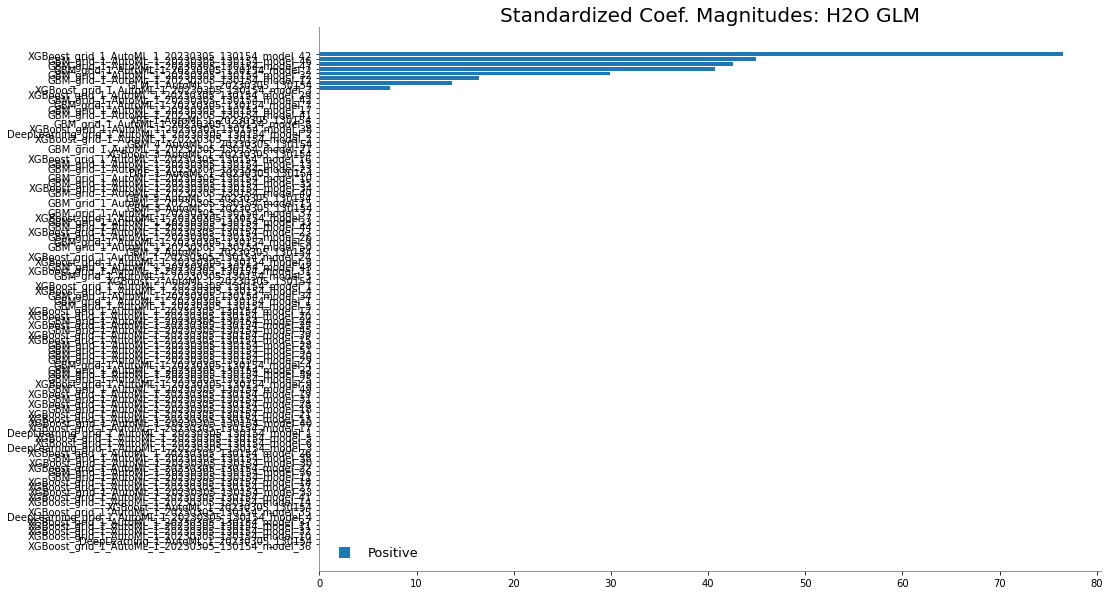

In [23]:
%matplotlib inline
metalearner.std_coef_plot()

In [24]:
leader_model = aml.leader
y_pred = leader_model.predict(test)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [25]:
!pip install pandas h2o matplotlib scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [27]:
df_results = pd.DataFrame()
df_results['ground_truth'] = h2o.as_list(test['Vhembe'],use_pandas=True)
df_results['predictions'] = h2o.as_list(y_pred,use_pandas=True)
df_results.head()
 

,ground_truth,predictions
0,312,367.078457
1,9,69.908916
2,221,234.640925
3,376,534.985716
4,335,463.335497


In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("r2_score : ",r2_score(df_results['ground_truth'],df_results['predictions']))
print("mean_squared_error : ", mean_squared_error(df_results['ground_truth'],df_results['predictions']))

r2_score :  0.10830815771329827
mean_squared_error :  59412.473858720565


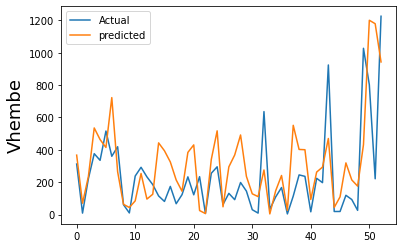

In [29]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('Vhembe',fontsize=18)
plt.legend(['Actual','predicted'])
plt.show()

WITHOUT DISTRICT

In [ ]:
df = h2o.import_file('Datareadyformodeling.csv')
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C1,Date,Capricorn,Greater Sekhukhune,Mopani,Vhembe,Waterberg,provincial,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,dis86AWRI,dis35EDI,dis48EDI,dis49EDI,dis65EDI,dis76EDI,dis35rainfall,dis48rainfall,dis49rainfall,dis50rainfall,dis63rainfall,dis64rainfall,dis65rainfall,dis76rainfall,dis77rainfall,dis86rainfall,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
0,1998-01-31 00:00:00,13,4,88,244,44,393,170.2,287.1,435.1,194.6,285,130.4,148.2,218.7,144.2,292.4,-0.8,-0.24,0.21,-0.5,-0.62,89,125.7,248.8,110.5,71.1,33.5,69.9,74.2,46.7,122.7,22.4955,26.2941,22.8145,24.6676,54.5551,63.448,69.9839,79.629,25.6824,76.25
1,1998-02-28 00:00:00,23,10,135,562,48,778,133.6,236.6,361,148.4,269.1,131.2,114.9,201.7,133.4,257.8,-1.19,-0.66,-0.57,-0.94,-0.89,11.9,30.4,52.1,11.5,56.9,35.4,9.1,41.6,28.7,47.6,24.818,27.0827,22.6467,24.5316,71.7615,55.558,68.564,76.5653,25.5208,75.7515
2,1998-03-31 00:00:00,7,3,109,312,24,455,114.2,201.9,324.6,129.1,219.1,139.2,117,185.2,159.4,237.7,-1.33,-0.97,-0.74,-0.91,-1.27,13.3,24,53.2,17.9,16.3,41.4,30.8,34.2,60.1,46.5,26.6233,27.2371,22.6036,25.0797,57.652,54.2124,65.2836,69.3575,25.6618,71.5484
3,1998-04-30 00:00:00,16,1,49,269,38,373,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,186,-1.45,-0.99,-0.79,-1.09,-1.48,5.3,28.3,32,3.9,30.1,21,8.2,13,35,5,22.02,23.5775,19.4189,21.4651,56.4429,54.8306,63.9708,74.3208,23.621,70.2694
4,1998-05-31 00:00:00,9,6,22,101,19,157,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,145.2,-1.49,-1.03,-0.87,-1.15,-1.51,0,0,0.2,0,0.1,0,0,0,0,0,16.2883,18.5366,15.746,18.8352,48.5081,44.1613,46.7473,57.9543,21.1301,56.5269
5,1998-06-30 00:00:00,3,0,12,17,0,32,57.9,112,172.3,63.7,121.1,75.6,59.5,94.2,91,114.7,-1.55,-1.06,-0.94,-1.18,-1.57,0,0.2,0.3,0,0,0,0,0,0,0,12.5907,15.3581,13.1685,16.5683,52.335,49.6944,50.2875,60.6069,18.7817,59.1903
6,1998-07-31 00:00:00,0,1,6,9,1,17,49.4,110.8,173.7,54.8,93.6,59.1,46.3,73.4,71.5,89.5,-1.56,-0.8,-0.63,-1.15,-1.54,4.5,23.9,39.8,5.5,0,0,0,0,0,0,13.6263,15.3958,12.9397,16.1515,53.3132,54.1129,58.6626,68.6922,17.7448,68.0954
7,1998-08-31 00:00:00,1,0,5,39,9,54,39.2,86.5,139.5,44.2,70.9,45.3,35.1,56.3,55.4,68.5,-1.6,-0.88,-0.71,-1.23,-1.67,2.4,4.8,10.8,3.5,0.8,0.1,0,0.7,0,0.6,16.2083,17.3426,14.2211,17.4195,47.1855,49.1263,52.6035,63.6761,19.0921,64.8938
8,1998-09-30 00:00:00,3,0,49,141,13,206,42.3,79.6,141.8,41.3,83.3,37.8,28.9,50,47.3,82.1,-1.52,-0.83,-0.54,-1.27,-1.46,14.3,17.1,40.3,9.9,33.1,4.5,3.6,9.5,5.8,32.7,22.4671,21.9817,17.8019,19.8042,43.5153,45.7111,54.8569,63.6778,21.3775,64.5986
9,1998-10-31 00:00:00,5,0,45,221,4,275,106.6,132.7,212.1,72,140.8,64.2,38.3,76.4,67,114.6,0.06,-0.42,0.32,-1.33,-1.33,77.7,77.3,112.2,43.6,85.6,38.3,18.7,43,33.5,59.3,24.0625,23.5652,19.22,20.0546,54.5551,58.1788,67.0927,80.5605,21.8766,74.0363


In [ ]:
splits = df.split_frame(ratios=[0.75],seed=1)
train = splits[0]
test = splits[1]

In [ ]:
y_test= test['Vhembe']
y_test

Vhembe
312
9
221
376
335
516
360
419
61
10


In [ ]:
y = "Vhembe" 
x = df.columns 
x.remove(y) 
x.remove("Capricorn")
x.remove("Greater Sekhukhune")
x.remove("Mopani")
x.remove("Waterberg")

In [ ]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |██
15:04:13.432: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 187.0.

█████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20230207_150409_model_13


Model Summary: 
    number_of_trees
--  -----------------
    38

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 2.7069708657821825
RMSE: 1.6452874720796309
MAE: 1.2866415008504124
RMSLE: 0.039352382597387034
Mean Residual Deviance: 2.7069708657821825

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 5200.045395272465
RMSE: 72.11134026817463
MAE: 40.82090376405155
RMSLE: 0.30896558530179746
Mean Residual Deviance: 5200.045395272465

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     40.8109   9.14196    34.5849       48.9148       32.7598       35.3535       52.4412
mean_residual_deviance  5195.74   2469.32    3843.69       7352.26       3588.81       2857.7        8336.26
mse                     5195.74   2469.32    3843.69       7352.26       3588.81       2857.7        8336.26
r2                      0.96621   0.0120479  0.986721      0.965719      0.963148      0.95593       0.959531
residual_deviance       5195.74   2469.32    3843.69       7352.26       3588.81       2857.7        8336.26
rmse                    70.482    16.883     61.9975       85.7453       59.9067       53.4575       91.3031
rmsle                   0.306797  0.0388482  0.317349      0.33755       0.28584       0.250074      0.34317

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-07 15:04:58  13.505 sec  0                  519.766          307.687         270156
    2023-02-07 15:04:58  13.516 sec  5                  97.7487          54.1189         9554.81
    2023-02-07 15:04:58  13.524 sec  10                 28.0789          14.7817         788.426
    2023-02-07 15:04:59  13.532 sec  15                 10.498           7.78491         110.209
    2023-02-07 15:04:59  13.541 sec  20                 7.66383          6.1153          58.7343
    2023-02-07 15:04:59  13.550 sec  25                 4.53663          3.64769         20.581
    2023-02-07 15:04:59  13.558 sec  30                 3.18758          2.57604         10.1607
    2023-02-07 15:04:59  13.568 sec  35                 2.06588          1.64899         4.26788
    2023-02-07 15:04:59  13.577 sec  38                 1.64529          1.28664         2.70697

Variable Importances: 
variable            relative_importance    scaled_importance       percentage
------------------  ---------------------  ----------------------  ----------------------
provincial          32855542.0             1.0                     0.834568940182512
C1                  5241887.5              0.15954347975753985     0.1331500328142801
Date                244095.328125          0.0074293502181458455   0.006200304937802693
dis86rainfall       198629.09375           0.006045527836673643    0.0050454097594965965
humidityTha         129599.7578125         0.003944532639653304    0.003291984424590785
dis77rainfall       97420.9453125          0.002965129758398142    0.0024746051999699654
dis50AWRI           71406.2890625          0.002173340773453075    0.0018138027059561742
dis63AWRI           61065.02734375         0.001858591386005746    0.0015511226432511616
dis35EDI            42954.5078125          0.001307374804911147    0.0010910944053560145
humidityHoe         39743.13671875         0.0012096326616298097   0.0010095218484265415
---                 ---                    ---                     ---
dis48AWRI           5739.2607421875        0.00017468166381755322  0.00014578389104153325
dis49rainfall       5620.61

In [ ]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_2_20230207_150409_model_13,72.1113,5200.05,40.8209,0.308966,5200.05
XGBoost_grid_1_AutoML_2_20230207_150409_model_8,72.7257,5289.02,41.7538,0.275848,5289.02
StackedEnsemble_BestOfFamily_4_AutoML_2_20230207_150409,78.2925,6129.71,41.2584,nan,6129.71
XGBoost_grid_1_AutoML_2_20230207_150409_model_23,79.2548,6281.32,45.5614,0.429232,6281.32
DeepLearning_grid_1_AutoML_2_20230207_150409_model_1,88.0877,7759.44,58.2447,nan,7759.44
XGBoost_grid_1_AutoML_2_20230207_150409_model_36,89.2267,7961.4,48.2472,0.291843,7961.4
DeepLearning_grid_1_AutoML_2_20230207_150409_model_2,102.577,10521.9,75.7637,nan,10521.9
XGBoost_grid_1_AutoML_2_20230207_150409_model_16,102.618,10530.4,57.4174,nan,10530.4
XGBoost_grid_1_AutoML_2_20230207_150409_model_34,103.712,10756.1,57.2644,0.440373,10756.1
StackedEnsemble_AllModels_4_AutoML_2_20230207_150409,103.769,10767.9,56.9938,0.637154,10767.9


In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


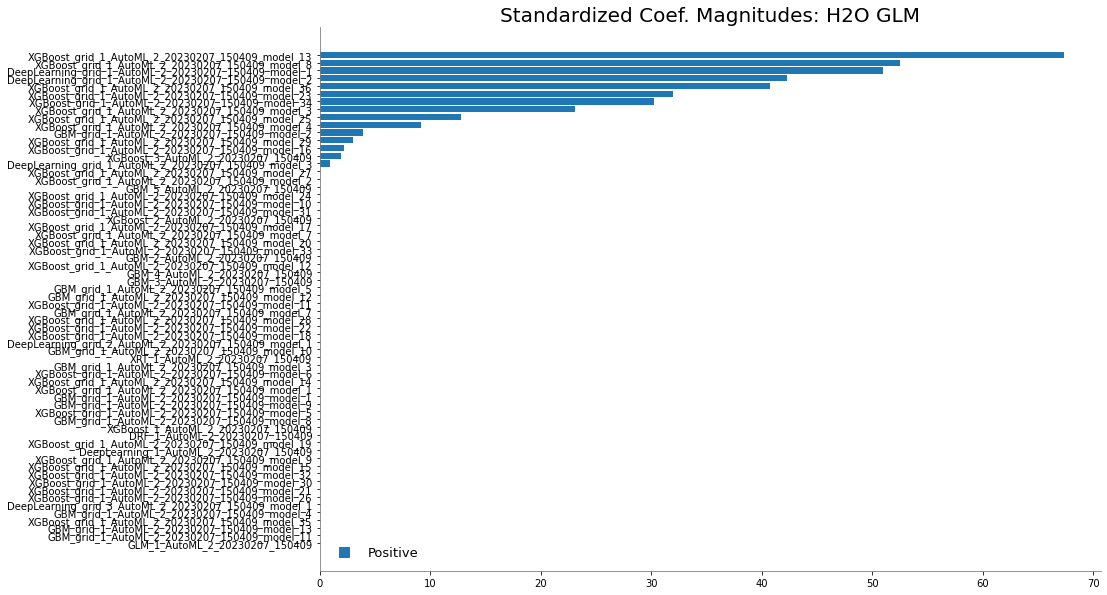

In [ ]:
%matplotlib inline
metalearner.std_coef_plot()

In [ ]:
leader_model = aml.leader
y_pred = leader_model.predict(test)


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [ ]:
df_results = pd.DataFrame()
df_results['ground_truth'] = h2o.as_list(test['Vhembe'],use_pandas=True)
df_results['predictions'] = h2o.as_list(y_pred,use_pandas=True)
df_results.head()


,ground_truth,predictions
0,312,336.764618
1,9,17.464989
2,221,173.248413
3,376,489.461212
4,335,351.852905


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("r2_score : ",r2_score(df_results['ground_truth'],df_results['predictions']))
print("mean_squared_error : ", mean_squared_error(df_results['ground_truth'],df_results['predictions']))

r2_score :  0.7361373042383934
mean_squared_error :  17580.88923862502


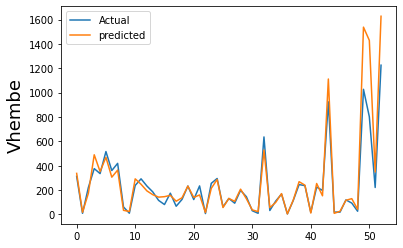

In [ ]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('Vhembe',fontsize=18)
plt.legend(['Actual','predicted'])
plt.show()

**K- SERIE**

Se instala las bibliotecas

In [30]:
!pip install pandas h2o matplotlib scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se cargan las bibliotecas

In [31]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats

In [32]:
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 18 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_l7s9jg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Se cargan el archivo csv para dentro del goocle colab (archivo de entrenamiento del model)

In [33]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Datareadyformodeling(whembe).csv to Datareadyformodeling(whembe) (1).csv


Se lee el archivo .csv

In [34]:
df = pd.read_csv('Datareadyformodeling(whembe).csv',index_col=0)

df.head()

,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,,
1998-01-31 00:00:00,244,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28 00:00:00,562,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31 00:00:00,312,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30 00:00:00,269,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31 00:00:00,101,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215


In [ ]:
Se grafican las variables para ver su distribucion

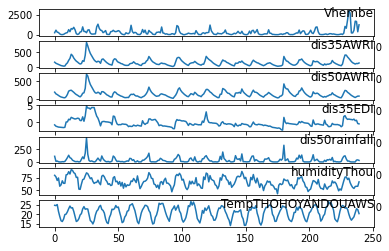

In [35]:
# specify columns to plot
values = df.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

Transformas las variables cargas en series de tiempo de acuerdo a un lag K determinado

In [36]:
df2 = df.copy()
num_lags = 1 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Vhembe') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
df_processed.columns

Index(['Vhembe', 'Vhembe_lag1', 'Vhembe_avg_window_length2', 'dis35AWRI_lag1',
       'dis35AWRI_avg_window_length2', 'dis50AWRI_lag1',
       'dis50AWRI_avg_window_length2', 'dis35EDI_lag1',
       'dis35EDI_avg_window_length2', 'dis35rainfall_lag1',
       'dis35rainfall_avg_window_length2', 'dis50rainfall_lag1',
       'dis50rainfall_avg_window_length2', 'humidityThou_lag1',
       'humidityThou_avg_window_length2', 'TempTHOHOYANDOUAWS_lag1',
       'TempTHOHOYANDOUAWS_avg_window_length2'],
      dtype='object')

Se muestra la variable objetvo o a predecir, la original como la transformada en una serie de lag k

In [37]:
mask = df_processed.columns.str.contains('Vhembe')
df_processed[df_processed.columns[mask]].head(10)

,Vhembe,Vhembe_lag1,Vhembe_avg_window_length2
Date,,,
1998-01-31 00:00:00,244,562.0,437.0
1998-02-28 00:00:00,562,312.0,290.5
1998-03-31 00:00:00,312,269.0,185.0
1998-04-30 00:00:00,269,101.0,59.0
1998-05-31 00:00:00,101,17.0,13.0
1998-06-30 00:00:00,17,9.0,24.0
1998-07-31 00:00:00,9,39.0,90.0
1998-08-31 00:00:00,39,141.0,181.0
1998-09-30 00:00:00,141,221.0,240.5


Se carga el archivo de prueba (.csv)

In [38]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Datareadyformodeling(whembe).csv to Datareadyformodeling(whembe) (2).csv


Se lee el archivo (.csv)

In [39]:
df1 = pd.read_csv('Datareadyformodeling(whembe).csv',index_col=0)

df1.head()

,Vhembe,dis35AWRI,dis50AWRI,dis35EDI,dis35rainfall,dis50rainfall,humidityThou,TempTHOHOYANDOUAWS
Date,,,,,,,,
1998-01-31 00:00:00,244,170.2,194.6,-0.80,89.0,110.5,79.629032,24.667608
1998-02-28 00:00:00,562,133.6,148.4,-1.19,11.9,11.5,76.565287,24.531596
1998-03-31 00:00:00,312,114.2,129.1,-1.33,13.3,17.9,69.357527,25.079704
1998-04-30 00:00:00,269,93.8,103.5,-1.45,5.3,3.9,74.320833,21.465139
1998-05-31 00:00:00,101,73.5,80.9,-1.49,0.0,0.0,57.954301,18.835215


Se grafican las variables del achivo cargado

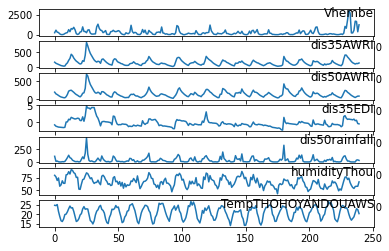

In [40]:
# specify columns to plot
values = df1.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

se convierten esas variables en una de serie de tiempo de lag K

In [41]:
df2 = df1.copy()
num_lags = 1 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Vhembe') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df1_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
df1_processed.columns

Index(['Vhembe', 'Vhembe_lag1', 'Vhembe_avg_window_length2', 'dis35AWRI_lag1',
       'dis35AWRI_avg_window_length2', 'dis50AWRI_lag1',
       'dis50AWRI_avg_window_length2', 'dis35EDI_lag1',
       'dis35EDI_avg_window_length2', 'dis35rainfall_lag1',
       'dis35rainfall_avg_window_length2', 'dis50rainfall_lag1',
       'dis50rainfall_avg_window_length2', 'humidityThou_lag1',
       'humidityThou_avg_window_length2', 'TempTHOHOYANDOUAWS_lag1',
       'TempTHOHOYANDOUAWS_avg_window_length2'],
      dtype='object')

Ahora se cargan el conjunto de entrenamiento(def_train) y de prueba(df_test) ya como una serie de tiempo a partir de los las variables procesadas como series de tiempos de los archivos cargados y procesados como k series

In [42]:
#df_processed.reset_index(drop=True,inplace=True)
#df_train = df_processed.loc[:int(df_processed.shape[0]*0.896),:]
#df_test = df_processed.loc[int(df_processed.shape[0]*0.896):,:]
df_train = df_processed
df_test = df1_processed

Se grafican los conjuntos de entrenamiento y de prueba

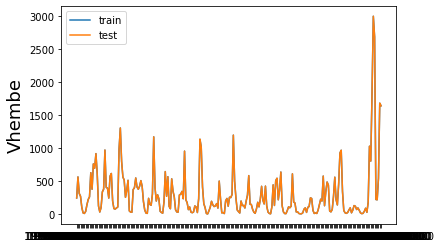

In [43]:
plt.plot(df_train.index,df_train['Vhembe'])
plt.plot(df_test.index,df_test['Vhembe'])
plt.ylabel('Vhembe',fontsize=18)
plt.legend(['train','test'])
plt.show()

Se procesan usando los metamodelos programados en H2o

In [45]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


se seleccina a vhembe como la variable a predecir

In [46]:
y = 'Vhembe'
X = hf_train.columns
X.remove(y)

Se entrena el modelo

In [47]:
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |█
13:09:13.228: GBM_1_AutoML_2_20230305_130910 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_2_20230305_130910.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 191.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 191.0.


██████████████████████████████████████

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_lr_search_selection_AutoML_2_20230305_130910_select_grid_model_1


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 4.1620661415183975e-07
RMSE: 0.0006451407708026518
MAE: 0.00048315725406678785
RMSLE: 2.9599479994416947e-05
Mean Residual Deviance: 4.1620661415183975e-07

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 133157.89962653123
RMSE: 364.90807010332236
MAE: 210.3766348021371
RMSLE: 1.0913300001179853
Mean Residual Deviance: 133157.89962653123

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     210.197    24.3639    215.509       209.75        248.011       187.215       190.502
mean_residual_deviance  132846     61725      130326        102368        239964        89321.1       102253
mse                     132846     61725      130326        102368        239964        89321.1       102253
r2                      -0.100729  0.457601   -0.0924839    0.600328      -0.0532049    -0.648545     -0.309737
residual_deviance       132846     61725      130326        102368        239964        89321.1       102253
rmse                    357.891    77.1403    361.007       319.95        489.861       298.866       319.77
rmsle                   1.09083    0.0381857  1.08228       1.07524       1.10865       1.0431        1.14487

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-05 13:18:39  0.535 sec   0                  482.065          287.067         232387
    2023-03-05 13:18:39  0.559 sec   5                  22.6992          12.0612         515.253
    2023-03-05 13:18:39  0.575 sec   10                 1.04215          0.522339        1.08609
    2023-03-05 13:18:39  0.587 sec   15                 0.0506848        0.0253823       0.00256895
    2023-03-05 13:18:39  0.604 sec   20                 0.00286836       0.00161516      8.22749e-06
    2023-03-05 13:18:39  0.626 sec   25                 0.000645505      0.000480773     4.16677e-07
    2023-03-05 13:18:39  0.637 sec   30                 0.000645141      0.000483157     4.16207e-07

Variable Importances: 
variable                               relative_importance    scaled_importance    percentage
-------------------------------------  ---------------------  -------------------  ------------
Vhembe_lag1                            2.37043e+07            1                    0.522902
dis35rainfall_avg_window_length2       5.0766e+06             0.214164             0.111987
dis35AWRI_avg_window_length2           4.1002e+06             0.172973             0.0904477
dis35rainfall_lag1                     3.03508e+06            0.128039             0.0669518
TempTHOHOYANDOUAWS_lag1                2.40535e+06            0.101473             0.0530604
dis35AWRI_lag1                         2.00845e+06            0.0847295            0.0443052
humidityThou_lag1                      1.51972e+06            0.0641117            0.0335241
humidityThou_avg_window_length2        1.03024e+06            0.0434622            0.0227265
dis50rainfall_lag1                     766559                 0.0323384            0.0169098
dis50AWRI_lag1                         675794                 0.0285093            0.0149076
dis35EDI_lag1                          286777                 0.0120981            0.00632612
TempTHOHOYANDOUAWS_avg_window_length2  213356                 0.00900072           0.00470649
dis50AWRI_avg_window_length2           205154               

se selecciona el mmodelo entrenado

In [48]:
leader_model = aml.leader

se hace la prediccion con el conjunto de prueba usando el modelo entrenado

In [49]:
hf_test_predict = leader_model.predict(hf_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


Se muestra el resultado de la prediccion

In [50]:
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Vhembe'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

,ground_truth,predictions
0,244,244.000305
1,562,561.999451
2,312,311.998749
3,269,268.999573
4,101,100.999817


Se calucla los R2 y el error cuadratico medio

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("r2_score : ",r2_score(df_results['ground_truth'],df_results['predictions']))
print("mean_squared_error : ", mean_squared_error(df_results['ground_truth'],df_results['predictions']))

r2_score :  0.9999999999972249
mean_squared_error :  4.1620661415034093e-07


Se grafican las predicion y el valor real

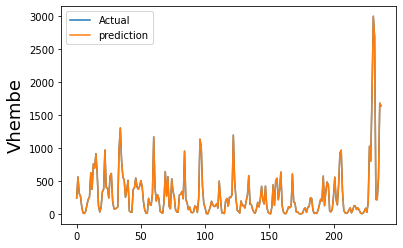

In [52]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('Vhembe',fontsize=18)
plt.legend(['Actual','prediction'])
plt.show()